**Q1)** Decision trees split the data into subsets based on feature values to create a tree-like structure. At each node of the tree, a decision is made on how to split the data, aiming to create subsets that are as "pure" as possible. The metrics for what purity means depend on whether it's a classification task or regression.

In classification exercises, the aim is to minimize class impurity using metrics like the Gini Index, which measures the probability of incorrectly classifying a randomly chosen instance if it were labeled according to the class distribution in the node. The tree chooses the feature and split point that result in the greatest reduction in impurity, producing subsets with more homogeneous class labels.

For regression, decision trees minimize variability in the target variable by reducing the Residual Sum of Squares (RSS), which measures the difference between observed values and their mean within each subset. At each step, the tree selects splits that most reduce this error, creating subsets where the target values are more consistent. This process is repeated recursively until stopping criteria, such as tree depth or minimum samples, are met.

**Q2)**

In [43]:
#Load packages I'm going to use
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score

      id status heart.attack.relative  gender  age    bmi diabetes alcohol  \
0  41475    Yes                    No  Female   62  58.04       No      No   
1  41477    Yes                    No    Male   71  30.05      Yes      No   
2  41479     No                    No    Male   52  27.56       No     Yes   
3  41481     No                    No    Male   21  23.34       No     Yes   
4  41482     No                    No    Male   64  33.64       No     Yes   

  smoke prehypertension vegetarian covered.health  
0    No              No         No             No  
1   Yes              No         No            Yes  
2    No              No         No             No  
3    No              No         No             No  
4   Yes              No         No            Yes  


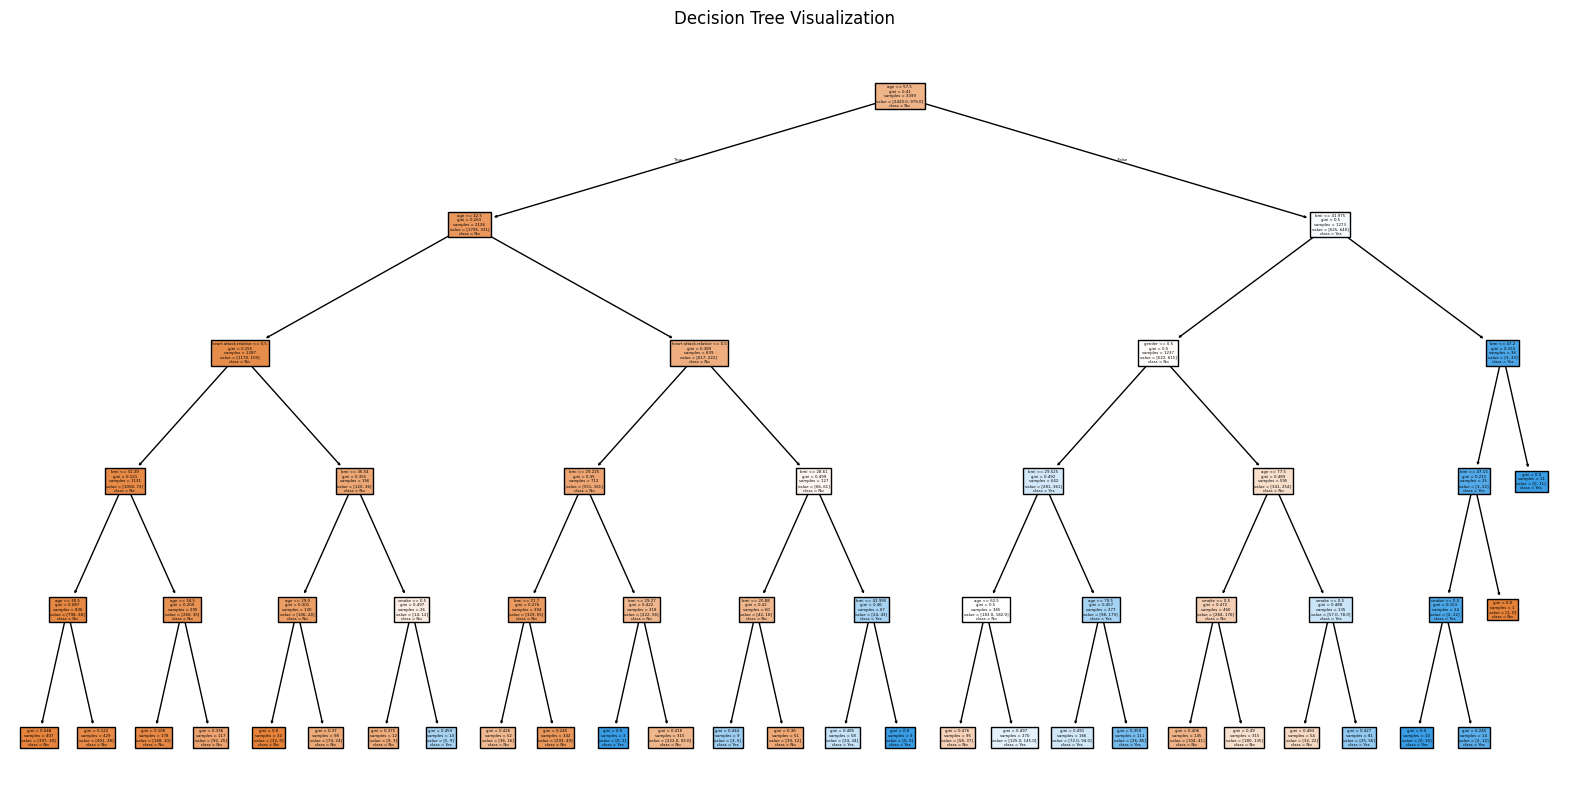

Decision Tree Accuracy: 0.7398764584763212
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.83      1020
           1       0.59      0.42      0.49       437

    accuracy                           0.74      1457
   macro avg       0.69      0.65      0.66      1457
weighted avg       0.72      0.74      0.73      1457



In [45]:
#Import the dataset
arthritis_data = pd.read_csv("https://raw.githubusercontent.com/ielbadisy/healthdatasets/master/arthritis.csv", sep=",", on_bad_lines='skip', low_memory=False)
print(df.head())

#Encode categorical variables
label_encoders = {}
for column in ['status', 'heart.attack.relative', 'gender', 'diabetes', 'alcohol',
               'smoke', 'prehypertension', 'vegetarian', 'covered.health']:
    label_encoders[column] = LabelEncoder()
    arthritis_data[column] = label_encoders[column].fit_transform(arthritis_data[column])

# Split data into target and feature
X = arthritis_data.drop(columns=['id', 'status'])  # Drop 'id' as it's not predictive
y = arthritis_data['status']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a decision tree classifier
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)  # Limiting depth for simplicity
dt_model.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

# Evaluating the decision tree
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print(f"Decision Tree Accuracy: {accuracy}")
print("Classification Report:\n", classification_report_result)



**Q3)**

Pruning a decision tree involves reducing its size by removing branches that have little predictive power. Pruning reduces overfitting by eliminating noise and irrelevant patterns, making the tree less complex and more interpretable. This trade-off enhances performance on unseen data while avoiding underfitting. The goal is to find a balance between complexity and generalizability on unseen data.

In practical terms, this involves splitting the training data into subsets and training multiple pruned trees, each with a different cost/complexity parameter alpha (larger alpha means a simpler model), and comparing their performance on validation subsets.

In this exerfcise, using cross-validation, I identified the optimal pruning parameter (𝛼=0.00086), which improved test accuracy from 73.99% to 74.33%.

Optimal CCP Alpha: 0.0008588382809941453


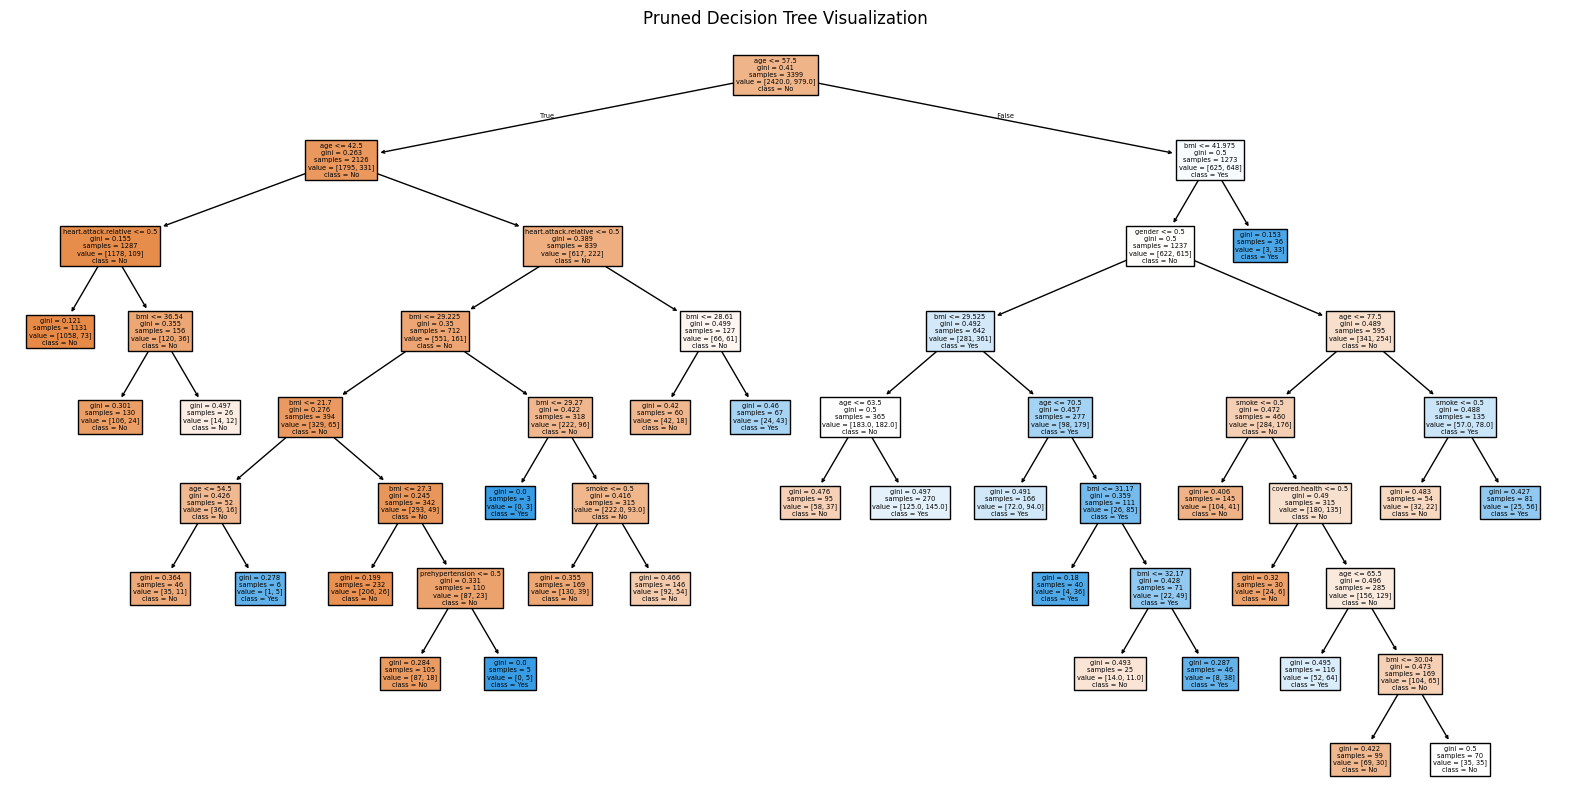

Pruned Tree Accuracy: 0.7433081674673988
Pruned Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.86      0.82      1020
           1       0.59      0.46      0.52       437

    accuracy                           0.74      1457
   macro avg       0.69      0.66      0.67      1457
weighted avg       0.73      0.74      0.73      1457



In [47]:
# Pruning the decision tree using cost-complexity pruning
path = dt_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas  # Effective alphas for pruning
impurities = path.impurities  # Total impurities at each alpha

# Train and evaluate models for each alpha
pruned_models = []
train_scores = []
test_scores = []

for ccp_alpha in ccp_alphas:
    pruned_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    pruned_tree.fit(X_train, y_train)
    train_scores.append(pruned_tree.score(X_train, y_train))
    test_scores.append(pruned_tree.score(X_test, y_test))
    pruned_models.append(pruned_tree)

# Select the best pruned model
optimal_index = test_scores.index(max(test_scores))
optimal_model = pruned_models[optimal_index]
optimal_ccp_alpha = ccp_alphas[optimal_index]

print(f"Optimal CCP Alpha: {optimal_ccp_alpha}")

# Plot the pruned tree
plt.figure(figsize=(20, 10))
plot_tree(optimal_model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Pruned Decision Tree Visualization")
plt.show()

# Evaluate the pruned tree
y_pruned_pred = optimal_model.predict(X_test)
pruned_accuracy = accuracy_score(y_test, y_pruned_pred)
pruned_classification_report = classification_report(y_test, y_pruned_pred)

print(f"Pruned Tree Accuracy: {pruned_accuracy}")
print("Pruned Classification Report:\n", pruned_classification_report)

**Q4)** Bagging is an ensemble learning method where you build multiple independent models by training them on different subsets of the data obtained by sampling with replacement, ie. bootstrapping. The models are then combined (either by averaging or voting) to reduce variance and improve stability.

Boosting, on the other hand, constructs an ensemble model sequentially by training each new model to correct the errors of the previous ones. Each model in the sequence focuses more on the misclassified samples, effectively reducing bias. The learning rate will determine the contribution of each tree to the final model; a smaller value slows down learning, which tends to improve teh performance of the model but will mean training takes longer.

**Q5)** The model below builds 100 decision trees (n_estimators=100), each trained on a random bootstrap sample of the training data. Random feature selection at each split  enhances diversity among trees and at the end, predictions are aggregated using majority voting for classification.

The test error rate is calculated as 1−accuracy. In this case, the model achieved a test accuracy of 73%, resulting in a test error rate of 27%.

In [48]:
# Create the bagging classifier using Decision Tree as the base estimator
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # n_estimators specifies the number of decision trees in the ensemble
rf_model.fit(X_train, y_train)

# Evaluating the Random Forest model
rf_y_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_error_rate = 1 - rf_accuracy

print(f"Bagging Random Forest test accuracy: {rf_accuracy:.2f}")
print(f"Bagging Random Forest test error rate: {rf_error_rate:.2f}")


Bagging Random Forest test accuracy: 0.73
Bagging Random Forest test error rate: 0.27


**Q6)** Lower values for the learning rate tend to enhance accuracy by allowing finer adjustments but require more iterations. Deeper trees capture complex patterns but can also lead to overfitting.

In [49]:
# Implementing GB
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.2, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

# Evaluate the GB odel
gb_y_pred = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_y_pred)
gb_error_rate = 1 - gb_accuracy

print(f"Gradient Boosting Test Accuracy: {gb_accuracy:.2f}")
print(f"Gradient Boosting Test Error Rate: {gb_error_rate:.2f}")


Gradient Boosting Test Accuracy: 0.74
Gradient Boosting Test Error Rate: 0.26


**Q7)** Gradient boosting performed slightly better. This might be because GB learns and adapts from its mistakes as it goes. Random Forest is better for handling noisy data and being robust, but it doesn’t adapt to errors the same way as boosting does.

**Q8)** Variable importance scores highlight which features the models relied on most when making predictions. For example, for RF he most important features were BMI (42.53%) and age (37.82%), indicating these variables played a major role in arthritis classification.

In [50]:
# Variable Importance for RF
rf_feature_importance = rf_model.feature_importances_

# Variable Importance for GB
gb_feature_importance = gb_model.feature_importances_

# Display importance for top features
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Random Forest Importance': rf_feature_importance,
    'Gradient Boosting Importance': gb_feature_importance
}).sort_values(by='Random Forest Importance', ascending=False)

# Calculate variable importance for Random Forest and Gradient Boosting
rf_importances = rf_model.feature_importances_
gb_importances = gb_model.feature_importances_

# Create a DataFrame to compare variable importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Random Forest Importance': rf_importances,
    'Gradient Boosting Importance': gb_importances
}).sort_values(by='Random Forest Importance', ascending=False)

# Display the comparison
print(importance_df)


                 Feature  Random Forest Importance  \
3                    bmi                  0.425326   
2                    age                  0.378245   
1                 gender                  0.030886   
6                  smoke                  0.030613   
0  heart.attack.relative                  0.028525   
5                alcohol                  0.027990   
9         covered.health                  0.027414   
4               diabetes                  0.026685   
7        prehypertension                  0.016589   
8             vegetarian                  0.007729   

   Gradient Boosting Importance  
3                      0.270489  
2                      0.566087  
1                      0.035694  
6                      0.023166  
0                      0.053184  
5                      0.008934  
9                      0.021360  
4                      0.008434  
7                      0.009288  
8                      0.003363  


**Q9)**The PDPs show how the features age and BMI influence the predicted probability of arthritis while holding other variables constant. For age, both models show that the probability of arthritis increases with age, ie. age is a dominant predictor of arthritis. For BMI, the influence is less pronounced on both models (ie overall trend looks flatter). Compared to RF, for GB there are alot more fluctuations, suggesting there might be a non-linear relationship. In short, the PDPs show age as a primary driver of predictions while the relationship with BMI might be weaker but still relevant for determining arthritis risk.

<Figure size 1000x600 with 0 Axes>

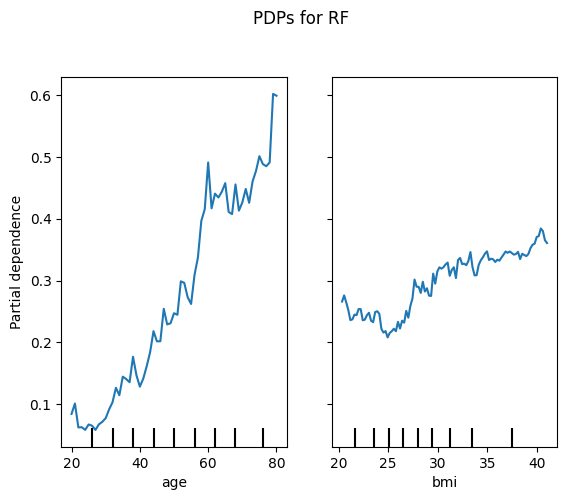

<Figure size 1000x600 with 0 Axes>

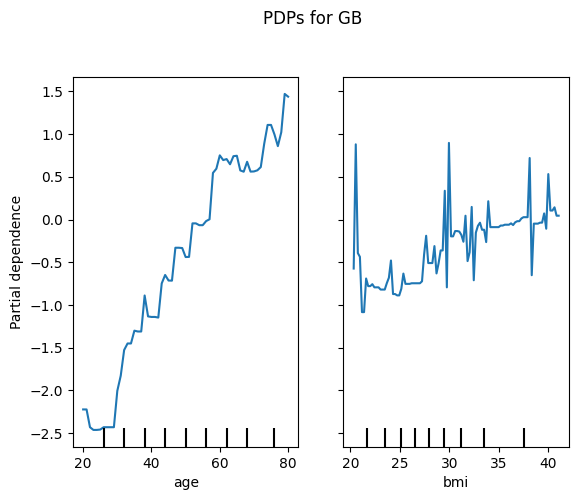

In [51]:
#Get top feaures in a list
top_rf_features = importance_df.sort_values(by="Random Forest Importance", ascending=False)['Feature'].head(2).tolist()
top_gb_features = importance_df.sort_values(by="Gradient Boosting Importance", ascending=False)['Feature'].head(2).tolist()
top_features = list(set(top_rf_features + top_gb_features))  # Combine lists

# Generate plots
plt.figure(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(rf_model, X, features=top_features, kind="average")
plt.suptitle("PDPs for RF", y=1.02)
plt.show()

plt.figure(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(gb_model, X, features=top_features, kind="average")
plt.suptitle("PDPs for GB", y=1.02)
plt.show()

**Q10)** The stacked ensemble achieved a test accuracy of 74%, which is comparable to the performance of the GB model and slightly better than RF. Using heterogeneous learners allows you to take advatange of their unique strengths,so that the final ensemble can capture a wider range of patterns in the data.  For instance, random forest is robust to noise, GB is good at in capturing sequential patterns, and SVM can identify linear separations effectively.

The choice of meta-learner whill play a role in how the predictions from the different learner models are aggregated. In this case, I chose an LR meta-learner which works well for more general patterns, but I could have used  more complex meta-learner like GB which might have improved performance by capturing non-linear relationships, albeit with a higher risk of overfitting.

In [52]:
# Define base learners for the ensemble
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)),
    ('svm', SVC(probability=True, kernel='linear', random_state=42))
]

# Define the meta-learner
meta_learner = LogisticRegression()

# Define the stacked model
stacked_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=5)

# Train the stacked model
stacked_model.fit(X_train, y_train)

# Evaluate the stacked model
stacked_y_pred = stacked_model.predict(X_test)
stacked_accuracy = accuracy_score(y_test, stacked_y_pred)

print(f"Stacked Ensemble Test Accuracy: {stacked_accuracy:.2f}")

Stacked Ensemble Test Accuracy: 0.74


**Q12)** Meta-algorithms like stacking addresse the bias-variance decomposition by combining predictions from different base learners in a structured way. When predictions from multiple models are combined (whether that is through averaging or majority voting), the variance of the ensemble decreases. For
𝑀 independent models, each with variance 𝜎^2, the ensemble's variance becomes 𝜎^2 /𝑀 which by definition reduces the variance. This happens because the random noise in individual model predictions cancel out when aggregated. Even if the base learners are not completely independent, as long as their errors are weakly correlated, the ensemble still achieves significant variance reduction. Using heterogenous models such as Random Forest, SVMs, and logistic regression further enhances this process by minimizing the overlap in their error patterns.

Stacking also reduces bias by introducing a meta-learner that learns how to optimally combine base learners' predictions. Unlike simple averaging, the meta-learner assigns weights to base models based on their strengths and weaknesses, ensuring that poorly performing models contribute less. This flexibility allows the meta-learner to capture complex patterns and interactions among base models, which further lowers bias. By balancing the trade-off between bias and variance, stacking creates a robust ensemble with better generalization and improved predictive accuracy, taking advantage the complementary strengths of heterogenous learner models.




